355.78705


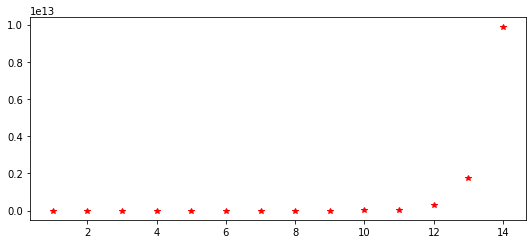

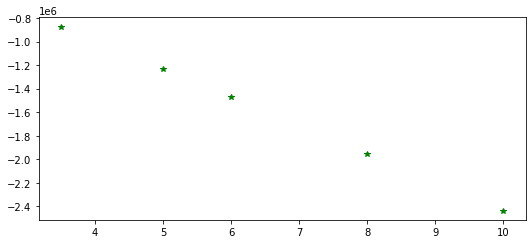

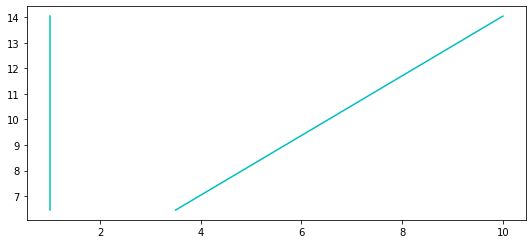

In [12]:
import numpy as np
from matplotlib import pyplot as plt

plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True

def costFUN(theta,x,y):
    return np.sum((theta[0]+theta[1]*x-y)**2)/2
def diffCostFun(theta,x,y):
    j=np.array([0,0])
    j[0]=np.sum(theta[0]+theta[1]*x-y)
    j[1]=np.sum((theta[0]+theta[1]*x-y)*x)
    return j
def fitGD(x,y,alpha,iter,theta):
    i=0
    while i<iter:
        theta=theta-alpha*diffCostFun(theta,x,y)
        i=i+1
        plt.plot(i, costFUN(theta,x,y), 'r*')
    plt.show()
    return theta
def fitNormal(x,y):
  m=x.shape[0]
  x=x.reshape(m,1)
  x=np.append(x,np.ones((m,1)),axis=1)
  y=y.reshape(m,1)
  theta=np.dot(np.linalg.inv(np.dot(x.T,x)),np.dot(x.T,y))
  return theta
def locally(x,y,tau,x_,iter):
    m = x.shape[0] 
    w = np.mat(np.eye(m))
    for i in range(iter): 
        xi = x[i] 
        d = (-2 * tau * tau)
        w[i, i] = np.exp(np.dot((xi-x_), (xi-x_).T)/d)
    X_ = np.append(x, np.ones(m).reshape(m,1), axis=1) 
    point_ = np.array([x_, 1])
    theta = np.linalg.pinv(X_.T*(w * X_))*(X_.T*(w * y)) 
    pred = np.dot(point_, theta)
    return pred

x=np.array([2.5,4.7,5.2,7.3,9.5,11.5])
y=np.array([5.21,7.70,8.30,11,14.5,15])
theta=np.array([0,0])
print(costFUN(theta,x,y))
theta=fitGD(x,y,0.01,14,theta)
X=np.array([3.5,5,6,8,10])
Y=theta[0]+theta[1]*X
plt.plot(X,Y,'g*')
plt.show()
theta=fitNormal(x,y)
X=X.reshape(X.shape[0],1)
X = np.append(X, np.ones((X.shape[0],1)), axis=1)
preds = np.dot(X, theta)
plt.plot(X, preds, 'c-')
plt.show()






  

